#인공지능을이용한의료영상처리및실습_Homework_1

#바이오메디컬공학부_201804594_손무현

1. 본인의 핸드폰을 이용하여 최소 2개 이상의 좋아하는 대상의 사진을 직접 촬영한 후, google colab. (또는 jupyter notebook 환경) 에서 불러와 촬영한 사진들을 display를 합니다.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
path0 = '/content/drive/MyDrive/Digital_image_processing/HW1/'

In [4]:
import os
print(os.listdir(path0))

['photo_2.jpg', 'photo_1.jpg']


In [105]:
img_1 = Image.open(path0+'photo_1.jpg')
print(img_1.format, img_1.size, img_1.mode)

f_1 = np.array(img_1) #numpy array로 변환
print(f_1.shape)

img_2 = Image.open(path0+'photo_2.jpg')
print(img_2.format, img_2.size, img_2.mode)

f_2 = np.array(img_2) #numpy array로 변환
print(f_2.shape)

JPEG (3024, 4032) RGB
(4032, 3024, 3)
JPEG (3024, 4032) RGB
(4032, 3024, 3)


첫번째 사진

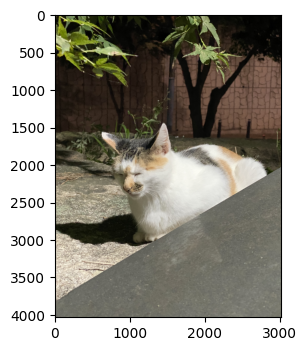

In [6]:
plt.figure(dpi=100)
plt.imshow(f_1)
plt.show()

두번째사진

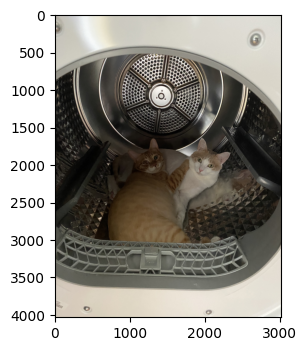

In [7]:
plt.figure(dpi=100)
plt.imshow(f_2)
plt.show()

2. 촬영한 사진의 header정보로부터 shutterspeed와 aperature의 값을 확인하여 봅니다 (text cell을 이용하여 사진 별로 값을 정리하여 주세요).


- 첫 번째 사진

 ApertureValue : (2, 1)

 ShutterSpeedValue : (13231, 2696)

- 두 번째 사진

 ApertureValue : (13166, 7763)

 ShutterSpeedValue : (8944, 1821)
 


In [8]:
from PIL.ExifTags import TAGS
exifdata = img_1.getexif()
cn = 0
for tag_id in exifdata:
    tag = TAGS.get(tag_id, tag_id)
    data = exifdata.get(tag_id)
    print(f"{tag:25}: {data}")
    cn = cn + 1
#    if cn > 30:
#        break

ExifVersion              : b'0231'
ComponentsConfiguration  : b'\x01\x02\x03\x00'
ShutterSpeedValue        : (13231, 2696)
DateTimeOriginal         : 2021:09:20 22:13:33
DateTimeDigitized        : 2021:09:20 22:13:33
ApertureValue            : (2, 1)
BrightnessValue          : (-9383, 13390)
ExposureBiasValue        : (0, 1)
MeteringMode             : 5
Flash                    : 16
FocalLength              : (6, 1)
ColorSpace               : 65535
ExifImageWidth           : 4032
DigitalZoomRatio         : (126, 103)
FocalLengthIn35mmFilm    : 63
SceneCaptureType         : 0
                    36880: +09:00
                    36881: +09:00
                    36882: +09:00
SubsecTimeOriginal       : 160
SubjectLocation          : (2011, 1507, 2318, 1387)
SubsecTimeDigitized      : 160
ExifImageHeight          : 3024
SensingMethod            : 2
Make                     : Apple
Model                    : iPhone 11 Pro
ExposureTime             : (1, 30)
Orientation              : 1
YCb

In [9]:
from PIL.ExifTags import TAGS
exifdata = img_2.getexif()
cn = 0
for tag_id in exifdata:
    tag = TAGS.get(tag_id, tag_id)
    data = exifdata.get(tag_id)
    print(f"{tag:25}: {data}")
    cn = cn + 1
#    if cn > 30:
#        break

ExifVersion              : b'0231'
ComponentsConfiguration  : b'\x01\x02\x03\x00'
ShutterSpeedValue        : (8944, 1821)
DateTimeOriginal         : 2021:09:25 09:36:23
DateTimeDigitized        : 2021:09:25 09:36:23
ApertureValue            : (13166, 7763)
BrightnessValue          : (-6714, 5321)
ExposureBiasValue        : (0, 1)
MeteringMode             : 5
Flash                    : 16
FocalLength              : (17, 4)
ColorSpace               : 65535
ExifImageWidth           : 4032
FocalLengthIn35mmFilm    : 26
SceneCaptureType         : 0
Make                     : Apple
                    36880: +09:00
                    36881: +09:00
                    36882: +09:00
SubsecTimeOriginal       : 025
SubjectLocation          : (2002, 1505, 2213, 1324)
SubsecTimeDigitized      : 025
ExifImageHeight          : 3024
SensingMethod            : 2
Model                    : iPhone 11 Pro
Orientation              : 1
ExposureTime             : (1, 30)
YCbCrPositioning         : 1
XResol

3. 촬영한 사진 중 하나를 가로, 세로 모두 1/8의 크기로 리사이즈한 영상을 display합니다.

In [100]:
print(img_1.size)
print(img_2.size)

(3024, 4032)
(3024, 4032)


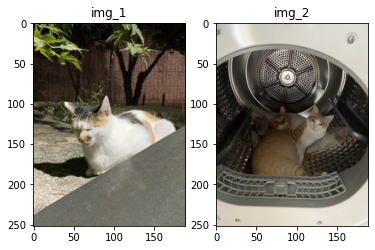

In [101]:
img_1 = img_1.resize((3024//16,4032//16))
img_2 = img_2.resize(((3024//16,4032//16)))

#plt.figure(dpi=100)
plt.subplot(1,2,1)
plt.imshow(img_1)
plt.title('img_1')
plt.subplot(1,2,2)
plt.imshow(img_2)
plt.title('img_2')
plt.show()


4. 3번에서 사이즈를 줄인 사진을 다시 원래의 크기로 리사이즈하여 display를 합니다. 이 때 nearest neighbor와 bicubic interpolation을 모두 사용하여 두 결과를 비교합니다.

 (차이가 잘 관찰이 되지 않는 경우 1/16, 1/32로 진행해 보거나, 일부영역만 crop을 하여 display를 해봅니다. 이미 제출한 학생은 다시 진행하지 않아도 괜찮습니다.)

In [102]:
img_1.size

(189, 252)

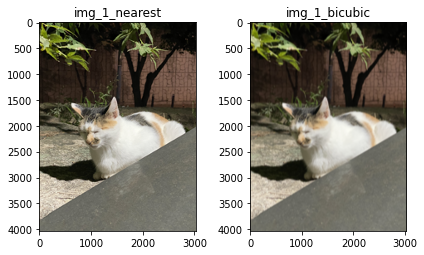

In [103]:
#plt.figure(dpi=100)
plt.subplot(1,2,1)
plt.imshow(img_1.resize((3024,4032)),interpolation='nearest')
plt.title('img_1_nearest')
plt.subplot(1,2,2)
plt.imshow(img_1.resize((3024,4032)),interpolation='bicubic')
plt.title('img_1_bicubic')
plt.tight_layout()
plt.show()

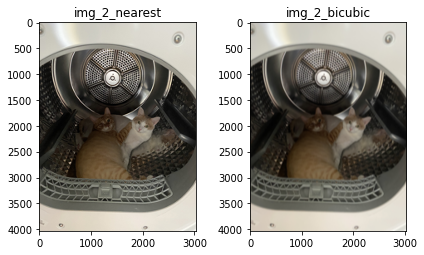

In [104]:
#plt.figure(dpi=100)
plt.subplot(1,2,1)
plt.imshow(img_2.resize((3024,4032)),interpolation='nearest')
plt.title('img_2_nearest')
plt.subplot(1,2,2)
plt.imshow(img_2.resize((3024,4032)),interpolation='bicubic')
plt.title('img_2_bicubic')
plt.tight_layout()
plt.show()

5. 서로 다른 두 개의 사진을 더한 결과와 뺀 결과를 각각 display하여 봅니다. 

In [106]:
print(img_1.size)
print(img_2.size)

(3024, 4032)
(3024, 4032)


Image Addition

In [125]:
print(type(img_Addition_unit))
print(type(img_Addition_int))

<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>


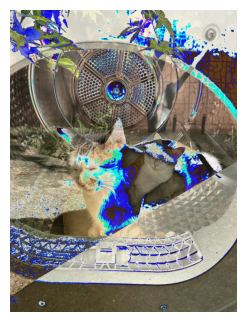

In [122]:
img_Addition_unit = Image.fromarray(np.asarray(img_1) + np.asarray(img_2)) #Image.fromarray()함수를 사용하여 numpy array를 PIL 이미지 객체로 다시 변환
plt.figure(dpi=100)
plt.imshow(img_Addition_unit)
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


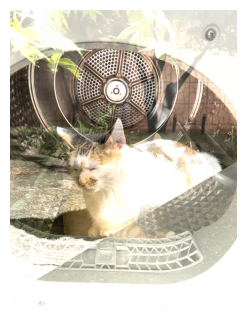

In [124]:
img_Addition_int = np.asarray(img_1).astype(int) + np.asarray(img_2).astype(int) #astype(int)한 상태로 numpy array끼리 더하기 연산 수행
plt.figure(dpi=100)
plt.imshow(img_Addition_int)
plt.axis('off')
plt.show()

Image Subtraction

두 사진에 대해 빼기 연산을 했을 때
img_diff_int의 경우 numpy array 원소들 중 음수값이 존재했지만
img_diff_uint의 경우 numpy array로 변환했을 때 원소가 모두 양수값들로 이루어져 있는 것을 확인할 수 있었다. 

두 경우는 각각 연산과정에서 numpy array 원소들의 datatype이 img_diff_int는 int64, img_diff_uint의 경우는 uint8로 서로 달랐다.

즉 연산에 사용되는 이미지들의 Datatype에 따라서 다른 결과의 이미지를 얻을 수 있는 것으로 생각된다.

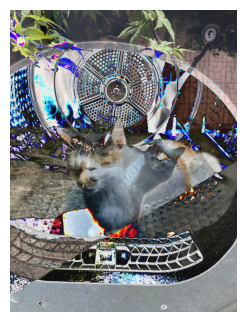

In [108]:
img_diff_uint = Image.fromarray(np.asarray(img_1) - np.asarray(img_2)) #Image.fromarray()함수를 사용하여 numpy array를 PIL 이미지 객체로 다시 변환
plt.figure(dpi=100)
plt.imshow(img_diff_uint)
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


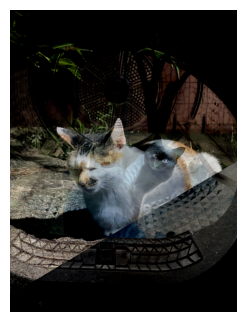

In [120]:
img_diff_int = np.asarray(img_1).astype(int) - np.asarray(img_2).astype(int) #astype(int)한 상태로 numpy array끼리 빼기 연산 수행
plt.figure(dpi=100)
plt.imshow(img_diff_int)
plt.axis('off')
plt.show()

In [128]:
print(np.asarray(img_diff_uint))

[[[175 178 121]
  [184 187 130]
  [195 197 142]
  ...
  [ 43  43  51]
  [ 43  43  51]
  [ 40  40  48]]

 [[182 179 133]
  [190 188 139]
  [198 196 145]
  ...
  [ 46  46  54]
  [ 45  45  53]
  [ 42  42  50]]

 [[175 165 127]
  [179 170 127]
  [187 178 130]
  ...
  [ 45  45  53]
  [ 43  43  51]
  [ 40  40  48]]

 ...

 [[148 155 163]
  [147 154 162]
  [146 153 161]
  ...
  [133 134 128]
  [140 141 135]
  [143 144 138]]

 [[148 156 164]
  [149 157 165]
  [151 158 166]
  ...
  [134 135 129]
  [140 141 135]
  [144 145 139]]

 [[147 154 159]
  [147 155 163]
  [150 157 165]
  ...
  [140 138 135]
  [145 143 140]
  [147 145 142]]]


In [127]:
print(img_diff_int)

[[[ -81  -78 -135]
  [ -72  -69 -126]
  [ -61  -59 -114]
  ...
  [-213 -213 -205]
  [-213 -213 -205]
  [-216 -216 -208]]

 [[ -74  -77 -123]
  [ -66  -68 -117]
  [ -58  -60 -111]
  ...
  [-210 -210 -202]
  [-211 -211 -203]
  [-214 -214 -206]]

 [[ -81  -91 -129]
  [ -77  -86 -129]
  [ -69  -78 -126]
  ...
  [-211 -211 -203]
  [-213 -213 -205]
  [-216 -216 -208]]

 ...

 [[-108 -101  -93]
  [-109 -102  -94]
  [-110 -103  -95]
  ...
  [-123 -122 -128]
  [-116 -115 -121]
  [-113 -112 -118]]

 [[-108 -100  -92]
  [-107  -99  -91]
  [-105  -98  -90]
  ...
  [-122 -121 -127]
  [-116 -115 -121]
  [-112 -111 -117]]

 [[-109 -102  -97]
  [-109 -101  -93]
  [-106  -99  -91]
  ...
  [-116 -118 -121]
  [-111 -113 -116]
  [-109 -111 -114]]]


In [114]:
np.asarray(img_1)

array([[[107, 115,  38],
        [117, 123,  49],
        [129, 132,  63],
        ...,
        [  6,   6,   4],
        [  5,   5,   3],
        [  3,   3,   1]],

       [[120, 122,  56],
        [126, 127,  61],
        [131, 130,  65],
        ...,
        [  6,   6,   4],
        [  4,   4,   2],
        [  3,   3,   1]],

       [[111, 106,  48],
        [113, 107,  47],
        [118, 110,  48],
        ...,
        [  5,   5,   3],
        [  3,   3,   1],
        [  2,   2,   0]],

       ...,

       [[111, 113, 102],
        [110, 112, 101],
        [110, 112, 101],
        ...,
        [116, 118, 104],
        [121, 123, 109],
        [123, 125, 111]],

       [[108, 111, 100],
        [109, 112, 101],
        [111, 113, 102],
        ...,
        [116, 120, 103],
        [121, 125, 108],
        [123, 127, 110]],

       [[105, 109,  95],
        [106, 109,  98],
        [109, 111, 100],
        ...,
        [119, 123, 106],
        [122, 126, 109],
        [122, 126, 109]]

In [131]:
type(np.asarray(img_1).astype(int)[0,0,0])

numpy.int64